In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math



In [2]:
df=pd.read_csv("FashionDataset.csv")
#print(df)

df["MRP"]=df["MRP"].replace("Nan",0)

df["SellPrice"]=df["SellPrice"].replace("Nan",0)

<mark><font color=red size=4 face=SimHei>Question#1. plot 3 histograms for the frequencies for real distribution, equal-weight and Bernford (for each digit)<font><mark>


In [3]:
df_disp=df

['849' '2449' '599' ... '643' '2799' '1899']


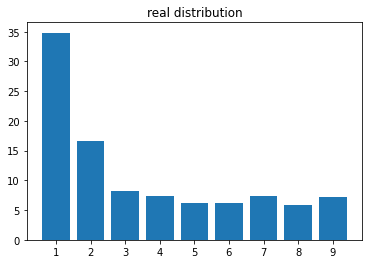

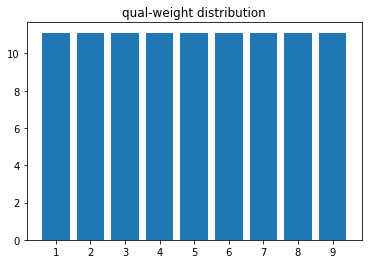

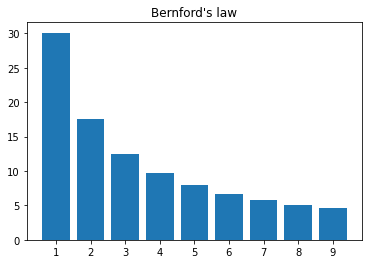

In [4]:
dig_list=list(range(1,10))
dig_list_hist=[]
dig_count=[0,0,0,0,0,0,0,0,0]
bf_law=[ 30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]
sell_price=df_disp["SellPrice"].values
print(sell_price)
for i in dig_list:
    count=0
    for j in sell_price:
        #print(str(j)[0])
        if i == int(str(j)[0]):
            dig_list_hist.append(int(str(j)[0]))
            count+=1
            dig_count[i-1]=count

#print(str(df_disp["MRP"][0])[0])
real_dis=[0,0,0,0,0,0,0,0,0]
dig_ew=[]
for i in range(len(dig_count)):
    real_dis[i]=(dig_count[i]/sum(dig_count))*100
    dig_ew.append(11.11)


plt.title("real distribution")
plt.xticks(dig_list)
plt.bar(x=dig_list,height=real_dis)
plt.show()

plt.bar(x=dig_list,height=dig_ew)
plt.xticks(dig_list)
plt.title("qual-weight distribution")
plt.show()

plt.title("Bernford's law")
plt.xticks(dig_list)
plt.bar(x=dig_list,height=bf_law)
plt.show()



<mark><font color=red size=4 face=SimHei>Question#2. plot 2 histograms for the relative errors for Models 1 and 2 (for each digit)<font><mark>

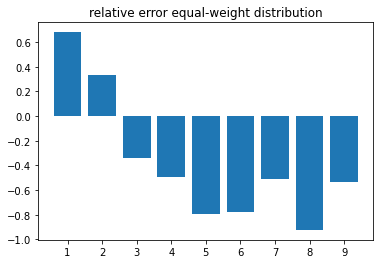

[0.6809919902912621, 0.3329714778725132, -0.34277993461381273, -0.4948964968152864, -0.79845785440613, -0.7770592212006489, -0.5072396788990825, -0.9237602459016392, -0.5354123831775699]


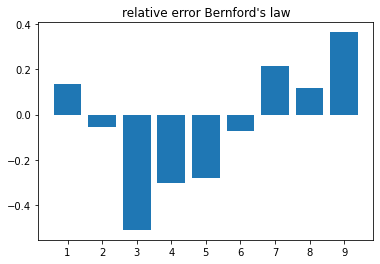

In [5]:
from codecs import ascii_decode


RE_rate_m1=[]
RE_rate_m2=[]

for i in range(len(dig_list)):
    RE_rate_m1.append((real_dis[i] - dig_ew[i])/real_dis[i])
    RE_rate_m2.append((real_dis[i] - bf_law[i])/real_dis[i])
        
plt.bar(x=dig_list,height=RE_rate_m1)
plt.xticks(dig_list)
plt.title("relative error equal-weight distribution")
plt.show()
print(RE_rate_m1)


plt.title("relative error Bernford's law")
plt.xticks(dig_list)
plt.bar(x=dig_list,height=RE_rate_m2)
plt.show()



<mark><font color=red size=4 face=SimHei>Question#3compute RMSE (root mean squared error) for model 1 and 2. Which model is closer to the real distribution?<font><mark>

In [6]:
RMSE_m2=0
RMSE_m1=0
sum_m2=0
sum_m1=0
for i in range(len(RE_rate_m2)):
    sum_m2+=(RE_rate_m2[i]**2)
    sum_m1+=(RE_rate_m1[i]**2)
RMSE_m2=math.sqrt(sum_m2/len(RE_rate_m2))
RMSE_m1=math.sqrt(sum_m1/len(RE_rate_m1))
print("RMSE for model 1 is ",RMSE_m1)
print("RMSE for model 2 is ",RMSE_m2)
print("From my point of view, model 2(Bernford' law) is more close to the real distribution ")

RMSE for model 1 is  0.6303163407179797
RMSE for model 2 is  0.26881150887719035
From my point of view, model 2(Bernford' law) is more close to the real distribution 




<mark><font color=red size=4 face=SimHei>Question#4 take 3 categories of your choice For each of these categories do the following: (a) compute F , P and π. (b) using RMSE as a ”distance” metric, for which of these chosen three coun- tries is the distribution ”closest” to equal weight P ?<font><mark>

In [7]:
inital=[]
for i in range(len(df)):
    inital.append(int(str(df["SellPrice"][i])[0]))
#print(inital)
df_disp["inital"]=inital
Category =df["Category"].unique()
total_sum={}
for i in Category:
    for j in dig_list:
        #test=df.loc[(df["Category"]==i)&(df["inital"]==j),:].sum()
        total_sum[(i,j)]=int(df.loc[(df["Category"]==i)&(df["inital"]==j),:]["inital"].value_counts().values)
#print(total_sum)
total_sum_res={}
for i in Category:
    count=0
    for j in dig_list:
        count+=total_sum[(i,j)]
        total_sum_res[i]=count
#print(total_sum_res)
Q4_real_dis={}
for i in Category:
    temp=[]
    for j in dig_list:
        a=(total_sum[((i,j))]/total_sum_res[i])*100
        temp.append(a)
        #print(temp)
        Q4_real_dis[i]=temp
print("for real distribution is",Q4_real_dis)
Q4_RE_rate_m1={}
for i in Category:
    temp=[]
    for j in range(len(dig_list)):
        a=((Q4_real_dis[i][j]-dig_ew[j])/Q4_real_dis[i][j])
        temp.append(a)
        Q4_RE_rate_m1[i]=temp
print("\n","for moled 1 RE is ",Q4_RE_rate_m1)

Q4_RE_rate_m2={}
for i in Category:
    temp=[]
    for j in range(len(dig_list)):
        a=((Q4_real_dis[i][j]-bf_law[j])/Q4_real_dis[i][j])
        temp.append(a)
        Q4_RE_rate_m2[i]=temp
print("\n","for moled 2 RE is ",Q4_RE_rate_m2)

Q4_squr={}
for i in Category:
    temp=[]
    for j in range(len(dig_list)):
        a=Q4_RE_rate_m1[i][j]**2
        temp.append(a)
        Q4_squr[i]=temp
print("\n","for moled 2 RE is ",Q4_squr)

Q4_final_res={}
for i in Category:
    temp=[]
    for j in range(len(dig_list)):
        a=math.sqrt(sum(Q4_squr[i])/9)
        Q4_final_res[i]=a
print("\n","Final RMSE for equal weight P is",Q4_final_res)
print("\n","three coun- tries is the distribution ”closest” to equal weight P is Lingerie&Nightwear-Women,Watches-Women and Indianwear-Women")


for real distribution is {'Westernwear-Women': [40.64160401002506, 13.132832080200501, 6.025062656641604, 6.345864661654136, 4.4411027568922306, 5.654135338345865, 7.639097744360902, 6.37593984962406, 9.74436090225564], 'Indianwear-Women': [36.80200501253133, 18.897243107769423, 6.5964912280701755, 6.0852130325814535, 5.694235588972431, 5.674185463659147, 7.9298245614035086, 6.145363408521303, 6.175438596491229], 'Lingerie&Nightwear-Women': [25.519379844961243, 16.74418604651163, 9.891472868217054, 9.178294573643411, 10.48062015503876, 8.124031007751938, 8.682170542635658, 5.550387596899225, 5.829457364341086], 'Footwear-Women': [31.11111111111111, 19.959595959595962, 11.95959595959596, 9.292929292929292, 5.454545454545454, 6.707070707070708, 3.878787878787879, 4.242424242424243, 7.3939393939393945], 'Watches-Women': [27.362318840579707, 18.434782608695652, 10.898550724637682, 9.971014492753623, 8.17391304347826, 9.043478260869566, 6.840579710144927, 4.521739130434783, 4.75362318840579


<mark><font color=red size=4 face=SimHei>Question#5 discuss your findings?<font><mark>

From my point of veiw,I believe bernford's law are more accurate to present the fact result. On the other hands, I consider that at least in this example,the equal wight distribution is hard to present the fact.